In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [2]:
df = pd.read_csv('telco.csv')

In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
num_cols = []
categorical_cols = []

In [5]:
def sort_cols(data):


    for i in data.columns:
        if data[i].dtypes == "object":
            categorical_cols.append(i)
        else :
            num_cols.append(i)

In [6]:
sort_cols(df)

In [7]:
def fix_cat_cols(data,cat_columns):
    for i in cat_columns:
        data[i] = data[i].fillna(data[i].mode()[0])

In [8]:
fix_cat_cols(df,categorical_cols)

In [9]:
def fix_num_cols(data,num_columns):
    for i in num_columns:
        data[i] = data[i].fillna(data[i].mean())

In [10]:
fix_num_cols(df,num_cols)

In [11]:
df['Total_volume (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

In [12]:
df['Session frequency'] = df.groupby(['Bearer Id'])['Dur. (ms)'].transform('count')

In [13]:
df['Session frequency'].value_counts()

1      122960
2       19648
3        4518
4        1196
991       991
5         360
6         150
7          84
9          36
8          32
16         16
10         10
Name: Session frequency, dtype: int64

In [14]:
df['Session frequency'].value_counts().nlargest(10)

1      122960
2       19648
3        4518
4        1196
991       991
5         360
6         150
7          84
9          36
8          32
Name: Session frequency, dtype: int64

In [15]:
groups = []

In [16]:
new_df = df.loc[df['Session frequency']!=9, :]

In [17]:
new_df1 = new_df.loc[df["Session frequency"]!=8,:]

In [18]:
new_df1

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_volume (Bytes),Session frequency
0,1.311448e+19,4/4/2019 12:01,770.0000,4/25/2019 14:35,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,3.456294e+08,1
1,1.311448e+19,4/9/2019 13:04,235.0000,4/25/2019 8:15,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,7.071854e+08,1
2,1.311448e+19,4/9/2019 17:42,1.0000,4/25/2019 11:58,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,3.076910e+08,1
3,1.311448e+19,4/10/2019 0:31,486.0000,4/25/2019 7:36,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,8.893527e+08,1
4,1.311448e+19,4/12/2019 20:10,565.0000,4/25/2019 10:40,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,6.076814e+08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0000,4/30/2019 6:02,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,6.318041e+08,1
149997,7.349883e+18,4/29/2019 7:28,483.0000,4/30/2019 10:41,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,7.057839e+08,1
149998,1.311448e+19,4/29/2019 7:28,283.0000,4/30/2019 10:46,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,6.276986e+08,2
149999,1.311448e+19,4/29/2019 7:28,696.0000,4/30/2019 10:40,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,4.015220e+08,2


In [19]:
user_per_MSISDN = new_df1.groupby(['Session frequency',"Dur. (ms)",'Total_volume (Bytes)']).agg({'MSISDN/Number':'count'}).reset_index()

In [20]:
X = df[['Session frequency','Dur. (ms)','Total_volume (Bytes)']]

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names = ["Session frequency","Dur. (ms)",'Total_volume (Bytes)']
X[col_names] = scaler.fit_transform(X[col_names])

C:\Users\CLASSISH\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [22]:
df[col_names]

,Session frequency,Dur. (ms),Total_volume (Bytes)
0,1,1.823652e+06,3.456294e+08
1,1,1.365104e+06,7.071854e+08
2,1,1.361762e+06,3.076910e+08
3,1,1.321509e+06,8.893527e+08
4,1,1.089009e+06,6.076814e+08
...,...,...,...
149996,1,8.123000e+04,6.318041e+08
149997,1,9.797000e+04,7.057839e+08
149998,2,9.824900e+04,6.276986e+08
149999,2,9.791000e+04,4.015220e+08


In [23]:
k = 3
centroids = (X.sample(n=k))

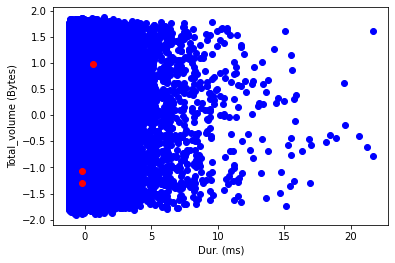

In [24]:
plt.scatter(X['Dur. (ms)'],X['Total_volume (Bytes)'],c='blue')
plt.scatter(centroids['Dur. (ms)'],centroids['Total_volume (Bytes)'],c='red')
plt.xlabel('Dur. (ms)')
plt.ylabel('Total_volume (Bytes)')
plt.show()

In [25]:
kmeans = KMeans(
    init= "random",
    n_clusters = 3,
    n_init= 10,
    max_iter= 300,
    random_state= 42
)

In [26]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3, random_state=42)

In [27]:
X['labels'] = kmeans.labels_

C:\Users\CLASSISH\AppData\Local\Temp/ipykernel_448/3168574615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['labels'] = kmeans.labels_


In [28]:
X

,Session frequency,Dur. (ms),Total_volume (Bytes),labels
0,-0.084545,21.213047,-0.614351,1
1,-0.084545,15.554551,0.865130,0
2,-0.084545,15.513311,-0.769595,1
3,-0.084545,15.016588,1.610557,0
4,-0.084545,12.147531,0.457962,0
...,...,...,...,...
149996,-0.084545,-0.288492,0.556671,0
149997,-0.084545,-0.081920,0.859396,0
149998,-0.072074,-0.078477,0.539872,0
149999,-0.072074,-0.082660,-0.385639,1


In [29]:
#X = df[['Session frequency','Dur. (ms)','Youtube DL (Bytes)']]

In [30]:
df['label'] = X["labels"]

In [31]:
X1 = df[df.label==1]

In [32]:
X2 = df[df.label==2]

In [33]:
X0 = df[df.label==0]

In [34]:
X1.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_volume (Bytes),Session frequency,label
count,7.416100e+04,74161.000000,74161.000000,7.416100e+04,7.416100e+04,7.416100e+04,7.416100e+04,74161.000000,74161.000000,74161.000000,...,7.416100e+04,7.416100e+04,7.416100e+04,7.416100e+04,7.416100e+04,7.416100e+04,7.416100e+04,7.416100e+04,74161.000000,74161.0
mean,1.013757e+19,500.038430,499.962163,1.050042e+05,2.082015e+14,4.564247e+10,4.845100e+13,109.201040,17.519238,13366.398538,...,1.092316e+07,2.100099e+08,8.227315e+06,4.216745e+08,8.218741e+06,4.085405e+07,2.424261e+08,2.832802e+08,1.240288,1.0
std,2.892910e+18,288.499709,287.857901,8.131948e+04,2.152776e+10,3.240130e+12,2.240490e+13,582.961563,71.098863,24160.700582,...,6.354410e+06,1.222060e+08,4.775196e+06,2.431467e+08,4.771592e+06,1.128674e+07,1.222171e+08,1.221673e+08,0.639327,0.0
min,6.917538e+18,0.000000,0.000000,7.189000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,2.260000e+02,2.516000e+03,5.900000e+01,6.178800e+04,1.480000e+02,5.276726e+06,7.114041e+06,2.895611e+07,1.000000,1.0
25%,7.349883e+18,251.000000,253.000000,5.819600e+04,2.082010e+14,3.365128e+10,3.546071e+13,35.000000,3.000000,43.000000,...,5.395521e+06,1.040763e+08,4.081810e+06,2.110324e+08,4.105812e+06,3.292978e+07,1.366511e+08,1.779508e+08,1.000000,1.0
50%,7.349883e+18,501.000000,501.000000,8.639900e+04,2.082015e+14,3.366379e+10,3.572141e+13,53.000000,7.000000,64.000000,...,1.087591e+07,2.096154e+08,8.199626e+06,4.230845e+08,8.198960e+06,4.086912e+07,2.421541e+08,2.833969e+08,1.000000,1.0
75%,1.304243e+19,750.000000,751.000000,1.325530e+05,2.082018e+14,3.368452e+10,8.611970e+13,109.795706,17.662883,19860.000000,...,1.639996e+07,3.149459e+08,1.234097e+07,6.313011e+08,1.233934e+07,4.873444e+07,3.474160e+08,3.884694e+08,1.000000,1.0
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082099e+14,8.823971e+14,9.900120e+13,96923.000000,5607.000000,378160.000000,...,2.201184e+07,4.639924e+08,1.655856e+07,8.434425e+08,1.655882e+07,7.833131e+07,4.846054e+08,4.963583e+08,16.000000,1.0


In [35]:
X0.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_volume (Bytes),Session frequency,label
count,7.484900e+04,74849.000000,74849.000000,7.484900e+04,7.484900e+04,7.484900e+04,7.484900e+04,74849.000000,74849.000000,74849.000000,...,7.484900e+04,7.484900e+04,7.484900e+04,7.484900e+04,7.484900e+04,7.484900e+04,7.484900e+04,7.484900e+04,74849.000000,74849.0
mean,1.014017e+19,498.263023,497.440059,1.049285e+05,2.082017e+14,3.820479e+10,4.850866e+13,104.398412,17.805824,13256.110075,...,1.108154e+07,6.322244e+08,8.352025e+06,4.206155e+08,8.307126e+06,4.138829e+07,6.650008e+08,7.063891e+08,1.240324,0.0
std,2.893451e+18,288.747400,288.333111,8.081190e+04,2.150861e+10,1.231668e+12,2.243355e+13,469.058937,81.664541,23855.441987,...,6.361667e+06,1.224981e+08,4.787659e+06,2.432060e+08,4.764609e+06,1.126168e+07,1.225560e+08,1.226310e+08,0.637126,0.0
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.082001e+14,3.360100e+10,1.194901e+12,0.000000,0.000000,0.000000,...,3.500000e+01,3.839895e+08,2.230000e+02,3.290000e+03,1.560000e+02,2.866892e+06,4.269671e+08,4.946574e+08,1.000000,0.0
25%,7.349883e+18,248.000000,249.000000,5.788000e+04,2.082014e+14,3.365155e+10,3.546261e+13,35.000000,3.000000,43.000000,...,5.568235e+06,5.271389e+08,4.190309e+06,2.095365e+08,4.186418e+06,3.349725e+07,5.593431e+08,6.001923e+08,1.000000,0.0
50%,7.349883e+18,497.000000,498.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572261e+13,54.000000,7.000000,63.000000,...,1.113121e+07,6.322420e+08,8.387787e+06,4.203942e+08,8.330877e+06,4.142705e+07,6.646957e+08,7.057248e+08,1.000000,0.0
75%,1.304243e+19,748.000000,748.000000,1.330410e+05,2.082018e+14,3.368372e+10,8.611970e+13,109.795706,17.662883,19640.000000,...,1.661184e+07,7.383023e+08,1.251884e+07,6.320030e+08,1.241326e+07,4.932167e+07,7.709769e+08,8.120447e+08,1.000000,0.0
max,1.318654e+19,999.000000,999.000000,1.859327e+06,2.140743e+14,3.370000e+14,9.900120e+13,64640.000000,7120.000000,269362.000000,...,2.201196e+07,8.434419e+08,1.655879e+07,8.434301e+08,1.655877e+07,7.745813e+07,9.029696e+08,9.559848e+08,16.000000,0.0


In [36]:
X2.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_volume (Bytes),Session frequency,label
count,9.910000e+02,991.000000,991.000000,991.000000,9.910000e+02,9.910000e+02,9.910000e+02,991.000000,991.000000,991.000000,...,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,991.0,991.0
mean,1.013887e+19,505.439140,514.677902,50834.301272,2.082016e+14,3.832793e+10,4.766041e+13,561.948115,17.616328,11653.001055,...,1.085725e+07,4.149583e+08,8.053810e+06,4.147876e+08,8.514732e+06,4.094145e+07,4.477856e+08,4.887270e+08,991.0,2.0
std,4.098068e+03,286.622942,287.529611,54714.466430,8.569370e+08,4.070960e+09,1.388011e+13,2259.478965,67.199159,17670.793732,...,6.504128e+06,2.391287e+08,4.905500e+06,2.475351e+08,4.873404e+06,1.113885e+07,2.395231e+08,2.399469e+08,0.0,0.0
min,1.013887e+19,1.000000,2.000000,7212.000000,2.082003e+14,3.360128e+10,3.515541e+13,19.000000,0.000000,0.000000,...,5.531600e+04,5.633310e+05,1.290200e+04,2.505540e+05,3.799000e+03,7.732426e+06,2.559244e+07,5.294461e+07,991.0,2.0
25%,1.013887e+19,263.000000,261.000000,17335.000000,2.082016e+14,3.366558e+10,3.573646e+13,75.500000,4.000000,197.500000,...,5.263428e+06,2.065803e+08,3.675089e+06,1.932962e+08,4.300834e+06,3.330972e+07,2.402559e+08,2.791471e+08,991.0,2.0
50%,1.013887e+19,498.000000,514.000000,32349.000000,2.082016e+14,4.188282e+10,4.847455e+13,119.000000,8.000000,4162.000000,...,1.051574e+07,4.097991e+08,7.998291e+06,4.206885e+08,8.300127e+06,4.112121e+07,4.403045e+08,4.807561e+08,991.0,2.0
75%,1.013887e+19,748.500000,763.000000,65102.000000,2.082016e+14,4.188282e+10,4.847455e+13,315.000000,17.662883,15290.500000,...,1.693489e+07,6.205102e+08,1.226920e+07,6.324970e+08,1.299812e+07,4.892567e+07,6.514215e+08,6.946005e+08,991.0,2.0
max,1.013887e+19,999.000000,999.000000,470053.000000,2.082099e+14,4.188282e+10,8.698270e+13,55811.000000,1744.000000,129244.000000,...,2.200757e+07,8.431777e+08,1.652703e+07,8.429731e+08,1.653920e+07,7.059071e+07,8.834314e+08,9.343946e+08,991.0,2.0


In [37]:
#plt.scatter(X1['Dur. (ms)'],X1['Total_volume (Bytes)'],hue,c='blue')
#plt.scatter(centroids['Dur. (ms)'],centroids['Total_volume (Bytes)'],c='red')
#plt.xlabel('Dur. (ms)')
#plt.ylabel('Total_volume (Bytes)')
#plt.show()

In [38]:
df['Social Media data'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Google data'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Email data'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Youtube data'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix data'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming data'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other data'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

In [39]:
df['User per Social'] = df.groupby(['MSISDN/Number'])['Social Media data'].transform('sum')
df['User per Google'] = df.groupby(['MSISDN/Number'])['Google data'].transform('sum')
df['User per Email'] = df.groupby(['MSISDN/Number'])['Email data'].transform('sum')
df['User per Youtube'] = df.groupby(['MSISDN/Number'])['Youtube data'].transform('sum')
df['User per Netflix'] = df.groupby(['MSISDN/Number'])['Netflix data'].transform('sum')
df['User per Gaming'] = df.groupby(['MSISDN/Number'])['Gaming data'].transform('sum')
df['User per Other'] = df.groupby(['MSISDN/Number'])['Other data'].transform('sum')

In [40]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix data,Gaming data,Other data,User per Social,User per Google,User per Email,User per Youtube,User per Netflix,User per Gaming,User per Other
0,1.311448e+19,4/4/2019 12:01,770.0000,4/25/2019 14:35,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.785519e+07,2.924265e+08,1.805588e+08,2.771612e+06,3.905804e+06,6.932608e+06,4.639787e+07,3.036140e+07,5.189561e+08,4.998505e+08
1,1.311448e+19,4/9/2019 13:04,235.0000,4/25/2019 8:15,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,3.556554e+07,6.099208e+08,5.419594e+08,3.469123e+06,1.203841e+07,3.146166e+06,5.206528e+07,5.455951e+07,7.903986e+08,1.097356e+09
2,1.311448e+19,4/9/2019 17:42,1.0000,4/25/2019 11:58,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,2.375120e+07,2.299803e+08,4.149084e+08,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08
3,1.311448e+19,4/10/2019 0:31,486.0000,4/25/2019 7:36,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.509259e+07,8.103879e+08,7.618372e+08,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08
4,1.311448e+19,4/12/2019 20:10,565.0000,4/25/2019 10:40,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.753980e+07,5.312370e+08,5.646198e+08,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0000,4/30/2019 6:02,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,3.756186e+07,5.358069e+08,1.675193e+07,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07
149997,7.349883e+18,4/29/2019 7:28,483.0000,4/30/2019 10:41,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,4.064329e+07,6.316281e+08,7.146381e+08,3.503158e+06,1.587780e+07,3.246996e+06,3.331217e+07,5.379638e+07,1.470909e+09,1.494133e+09
149998,1.311448e+19,4/29/2019 7:28,283.0000,4/30/2019 10:46,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,1.502970e+07,5.669338e+08,1.324156e+08,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08
149999,1.311448e+19,4/29/2019 7:28,696.0000,4/30/2019 10:40,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,1.649484e+07,3.550664e+08,8.161200e+08,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08


In [41]:
User_per_app = ['User per Social','User per Google','User per Email','User per Youtube','User per Netflix','User per Gaming','User per Other']

In [42]:
for i in User_per_app :
    print(df[i].value_counts().nlargest(10))

1.973817e+09    1066
4.337478e+07      18
2.713550e+07      17
2.829454e+07      17
3.541236e+07      16
1.922292e+07      15
3.978319e+07      15
2.424785e+07      13
1.780891e+07      12
2.077720e+07      12
Name: User per Social, dtype: int64
8.248577e+09    1066
1.521919e+08      18
1.423079e+08      17
1.279738e+08      17
1.165163e+08      16
1.232231e+08      15
1.098605e+08      15
1.050327e+08      13
8.692902e+07      12
1.102545e+08      12
Name: User per Google, dtype: int64
2.399880e+09    1066
4.241878e+07      18
4.063397e+07      17
4.078863e+07      17
3.599979e+07      16
3.369377e+07      15
3.151442e+07      15
3.033580e+07      13
2.619890e+07      12
2.356722e+07      12
Name: User per Email, dtype: int64
2.434073e+10    1066
3.744830e+08      18
3.943702e+08      17
4.529588e+08      17
2.579911e+08      16
3.174106e+08      15
3.962892e+08      15
3.152313e+08      13
3.031691e+08      12
3.087908e+08      12
Name: User per Youtube, dtype: int64
2.425357e+10    

In [43]:
top_3_apps = ["Gaming data","Other data","Youtube data"]

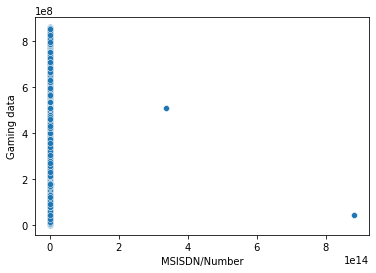

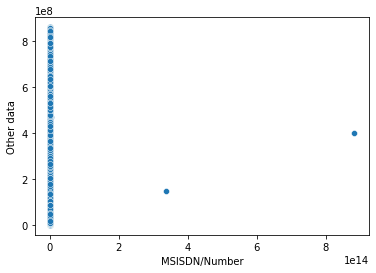

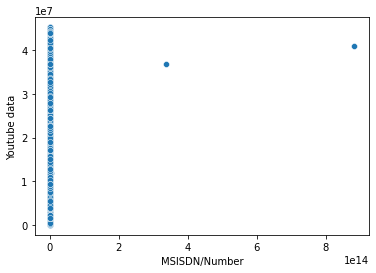

In [44]:
for i in top_3_apps:
    sns.scatterplot(data=df, x='MSISDN/Number',y=i)
    plt.show()

In [45]:
kmeans_kwargs ={
    'init': "random",
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42
}

In [46]:
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

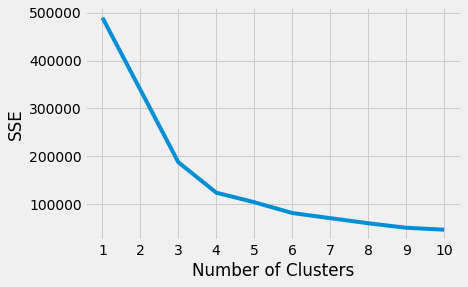

In [47]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()